## Sequential Forward Selection (SFS)

In [2]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector

### Import dataset

In [3]:
df = pd.read_csv("Finaltest.csv")

In [4]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,date_registration,date_unregistration,final_result
0,1,1,24213,0,0,2,4,0,0,90,...,0,0,0,0,0,0,0,-128,-46,0
1,1,1,40419,1,1,1,2,1,0,60,...,4,3,2,1,3,14,10,-46,171,0
2,1,1,41060,1,2,3,7,0,0,60,...,34,2,5,0,22,87,6,-24,0,1
3,1,1,43284,1,1,1,8,0,2,180,...,47,22,9,2,32,87,36,-28,226,0
4,1,1,45664,1,3,3,6,0,1,60,...,27,0,6,2,54,123,64,-31,0,1


### Drop columns

In [5]:
#df=df.drop(columns='id_student')
df=df.drop(columns='code_module')
df=df.drop(columns='code_presentation')
df=df.drop(columns='date_unregistration')
df=df.drop(columns='date_registration')

In [6]:
#check row and columns
df.shape

(1303, 23)

In [7]:
#Check missing value
df.isnull().sum()

id_student               0
gender                   0
region                   0
highest_education        0
imd_band                 0
age_band                 0
num_of_prev_attempts     0
studied_credits          0
disability               0
total_number_of_click    0
total_score              0
externalquiz             0
forumng                  0
glossary                 0
homepage                 0
oucontent                0
ouelluminate             0
ouwiki                   0
page                     0
resource                 0
subpage                  0
url                      0
final_result             0
dtype: int64

In [8]:
#check if any missing value
df[df.isnull().any(axis=1)]

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,final_result


In [9]:
X = df.iloc[:,0:22] # all columns/features except target 
y = df.iloc[:,-1]  #target

In [10]:
X

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2693243,0,3,1,5,1,0,60,0,2643,...,310,1,163,31,9,24,1,101,360,200
1299,2694933,0,1,2,1,0,0,60,1,935,...,87,0,76,19,16,14,1,45,81,30
1300,2697773,0,0,2,6,0,0,60,0,148,...,14,0,7,1,0,3,2,6,35,18
1301,2707979,0,1,1,6,0,0,120,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y

0       0
1       0
2       1
3       0
4       1
       ..
1298    1
1299    1
1300    1
1301    1
1302    1
Name: final_result, Length: 1303, dtype: int64

In [12]:
X.head()

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64


### Train and Fit dataset

In [13]:
from sklearn.model_selection import train_test_split
#training 0.3,
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

### Sequential Forward Selection

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
X_train.shape

(912, 22)

In [16]:
forward_feature_selection = SequentialFeatureSelector(GaussianNB(),
                                                     k_features= 22, #number of features
                                                     forward=True,   # Forward Feature
                                                     floating=False,
                                                     verbose=2,       #how model is fitted
                                                     scoring= "f1",   #performance matric
                                                     cv= 5).fit(X_train, y_train)   #cross validation
forward_feature_selection.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished

[2022-11-03 01:00:52] Features: 1/22 -- score: 0.838936169300686[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished

[2022-11-03 01:00:52] Features: 2/22 -- score: 0.843178385745029[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished

[2022-11-03 01:00:52] Features: 3/22 -- score: 0.845307150023326[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

{1: {'feature_idx': (10,),
  'cv_scores': array([0.84507042, 0.8436019 , 0.82629108, 0.83568075, 0.8440367 ]),
  'avg_score': 0.838936169300686,
  'feature_names': ('total_score',)},
 2: {'feature_idx': (7, 10),
  'cv_scores': array([0.85046729, 0.85849057, 0.8372093 , 0.8440367 , 0.82568807]),
  'avg_score': 0.843178385745029,
  'feature_names': ('studied_credits', 'total_score')},
 3: {'feature_idx': (5, 7, 10),
  'cv_scores': array([0.86111111, 0.85849057, 0.8372093 , 0.8440367 , 0.82568807]),
  'avg_score': 0.845307150023326,
  'feature_names': ('age_band', 'studied_credits', 'total_score')},
 4: {'feature_idx': (4, 5, 7, 10),
  'cv_scores': array([0.86111111, 0.85849057, 0.8372093 , 0.8440367 , 0.82568807]),
  'avg_score': 0.845307150023326,
  'feature_names': ('imd_band', 'age_band', 'studied_credits', 'total_score')},
 5: {'feature_idx': (4, 5, 6, 7, 10),
  'cv_scores': array([0.85581395, 0.85849057, 0.83870968, 0.84018265, 0.82568807]),
  'avg_score': 0.8437769837483569,
  'fea

In [17]:
forward_feature_selection.k_feature_idx_  #index number of features that significant

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)

In [18]:
forward_feature_selection.k_feature_names_ #name of the features choosen

('id_student',
 'gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'num_of_prev_attempts',
 'studied_credits',
 'disability',
 'total_number_of_click',
 'total_score',
 'externalquiz',
 'forumng',
 'glossary',
 'homepage',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'resource',
 'subpage',
 'url')

In [19]:
forward_feature_selection.k_score_

0.7843037639721754

In [28]:
download=pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
download.to_csv("forward.gaussian.csv")
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[0.8450704225352111, 0.8436018957345971, 0.826...",0.838936,"(total_score,)",0.009195,0.007154,0.003577
2,"(7, 10)","[0.8504672897196262, 0.8584905660377358, 0.837...",0.843178,"(studied_credits, total_score)",0.014426,0.011224,0.005612
3,"(5, 7, 10)","[0.861111111111111, 0.8584905660377358, 0.8372...",0.845307,"(age_band, studied_credits, total_score)",0.017009,0.013234,0.006617
4,"(4, 5, 7, 10)","[0.861111111111111, 0.8584905660377358, 0.8372...",0.845307,"(imd_band, age_band, studied_credits, total_sc...",0.017009,0.013234,0.006617
5,"(4, 5, 6, 7, 10)","[0.8558139534883721, 0.8584905660377358, 0.838...",0.843777,"(imd_band, age_band, num_of_prev_attempts, stu...",0.0155,0.01206,0.00603
6,"(4, 5, 6, 7, 8, 10)","[0.861111111111111, 0.8530805687203792, 0.8387...",0.843,"(imd_band, age_band, num_of_prev_attempts, stu...",0.017248,0.01342,0.00671
7,"(2, 4, 5, 6, 7, 8, 10)","[0.861111111111111, 0.8584905660377358, 0.8387...",0.845631,"(region, imd_band, age_band, num_of_prev_attem...",0.018362,0.014286,0.007143
8,"(1, 2, 4, 5, 6, 7, 8, 10)","[0.8558139534883721, 0.8584905660377358, 0.842...",0.843505,"(gender, region, imd_band, age_band, num_of_pr...",0.016914,0.01316,0.00658
9,"(1, 2, 3, 4, 5, 6, 7, 8, 10)","[0.861111111111111, 0.8584905660377358, 0.8317...",0.840144,"(gender, region, highest_education, imd_band, ...",0.022504,0.017509,0.008754
10,"(1, 2, 3, 4, 5, 6, 7, 8, 10, 15)","[0.8518518518518517, 0.8348623853211009, 0.827...",0.836191,"(gender, region, highest_education, imd_band, ...",0.018468,0.014369,0.007184


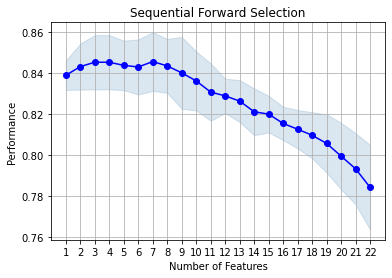

In [25]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [26]:
forward_feature_selection.k_feature_names_

('id_student',
 'gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'num_of_prev_attempts',
 'studied_credits',
 'disability',
 'total_number_of_click',
 'total_score',
 'externalquiz',
 'forumng',
 'glossary',
 'homepage',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'resource',
 'subpage',
 'url')

In [27]:
forward_feature_selection.k_score_

0.7843037639721754